In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.colors import to_rgba
import os
import sys
from tqdm.notebook import tqdm

# get version
print("Matplotlib version",mpl.__version__)

mpl.rc('font', family = 'Arial')
plt.ioff()

fp = "G:\\My Drive\\Darby Work\\Ytsma and Dyar 2021 (LOD paper)\\"
# read in results
data = pd.read_csv(fp + "average_results_011422.csv")
# detailed results
detail_data = pd.read_csv(fp + "results_011422.csv")

Matplotlib version 3.4.2


### compare outlier methods

In [135]:
temp_data = data[(data.atmosphere == 'Mars')&
                 (data.instrument == 'ChemLIBS')&
                 (data.method == 'metals')].copy(deep=True)

In [136]:
# differences in n standards by outlier defn
temp_data.groupby(['element', 'outlier_defn']).mean()[['n_train', 'n_test']].reset_index()

,element,outlier_defn,n_train,n_test
0,Li,highest_natural,421.5,2.0
1,Li,iqr_q3,374.5,109.0
2,MnO,highest_natural,2156.0,11.0
3,MnO,iqr_q3,2120.5,674.0
4,Na2O,highest_natural,2157.0,680.0
5,Na2O,iqr_q3,2125.5,690.0
6,Ni,highest_natural,1899.5,82.5
7,Ni,iqr_q3,1619.5,350.0
8,Pb,highest_natural,1770.5,583.5
9,Pb,iqr_q3,1672.5,469.5


In [137]:
thn = temp_data[temp_data.outlier_defn=='highest_natural'].reset_index(drop=True)
tq = temp_data[temp_data.outlier_defn=='iqr_q3'].reset_index(drop=True)

In [138]:
maj_list = ['MnO', 'Na2O', 'SiO2']
thn_maj = pd.DataFrame(thn[thn.element.isin(maj_list)].reset_index(drop=True))
thn_min = thn[~thn.element.isin(maj_list)].reset_index(drop=True)

tq_maj = pd.DataFrame(tq[tq.element.isin(maj_list)].reset_index(drop=True))
tq_min = tq[~tq.element.isin(maj_list)].reset_index(drop=True)

In [143]:
def outlier_comp(metric):
    
    sd = metric + '_sd'
    # define plot stuff
    width = 0.2
    c_b = '#540231'
    c_m = '#40888a'
    cap= 3
    ysize = 12
    lsize = 14
    tsize = 16
    klen = 5

    #labels
    majlab = thn_maj.element
    minlab = thn_min.element

    # tick locations
    majt1 = [0, 0.5, 1] 
    majt2 = [x + width for x in majt1]
    mint1 = np.arange(0,3,step=0.5)
    mint2 = [x + width for x in mint1]
    majtk = [x + width/2 for x in majt1]
    mintk = [x + width/2 for x in mint1]

    # make figure
    fig, (maj, minor) = plt.subplots(ncols = 2, figsize = (10,4),
                                     # make major one smaller
                                     gridspec_kw={'width_ratios': [1,2]})
    # majors
    tq_major = maj.bar(majt1, tq_maj[metric], width, yerr=tq_maj[sd], capsize=cap, label = "highest_natural", color = c_b)
    thn_major = maj.bar(majt2, thn_maj[metric], width, yerr=thn_maj[sd], capsize=cap, label = "iqr_q3", color = c_m)
    # minors
    tq_minor = minor.bar(mint1, tq_min[metric], width, yerr=tq_min[sd], capsize=cap, label = "highest_natural", color = c_b)
    thn_minor = minor.bar(mint2, thn_min[metric], width, yerr=thn_min[sd], capsize=cap, label = "iqr_q3", color = c_m)

    # formatting
    maj.tick_params(axis = 'y', which = 'major', labelsize = ysize,)
    maj.tick_params(length=klen)
    maj.set_xticks(majtk)
    maj.set_xticklabels(majlab, fontsize = lsize)
    maj.set_ylabel(metric, fontsize = tsize)

    minor.set_xticks(mintk)
    minor.set_xticklabels(minlab, fontsize = lsize)
    minor.set_ylabel(metric, fontsize = tsize)
    minor.tick_params(axis = 'y', which = 'major', labelsize = ysize)  
    minor.tick_params(length=klen)
    minor.legend(handles = [tq_major, thn_major], fontsize = lsize)
    
    plt.tight_layout()
    plt.savefig(fp + "figures\\outlier_comp_"+metric+".eps", dpi=600)
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


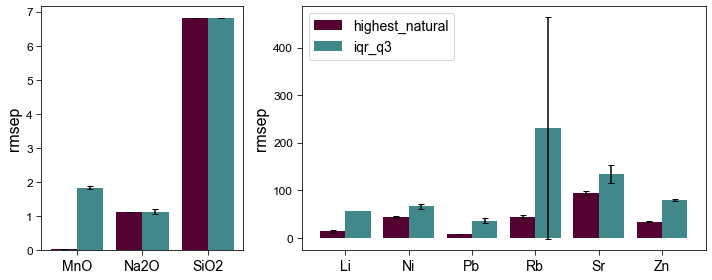

In [144]:
outlier_comp('rmsep')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


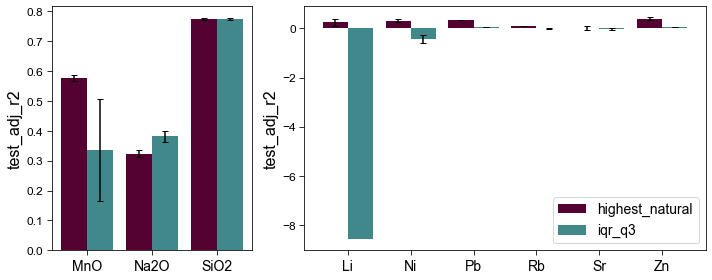

In [145]:
outlier_comp('test_adj_r2')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


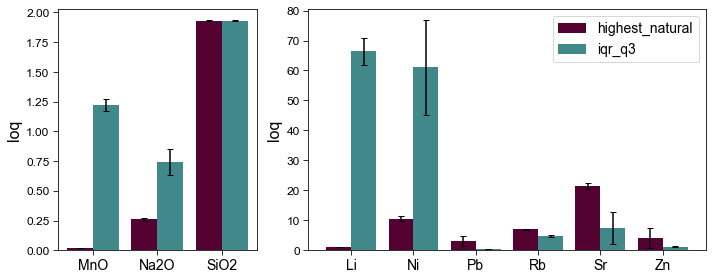

In [146]:
outlier_comp('loq')

# Braga regions
CADILLAC ChemLIBS

In [2]:
cad = pd.read_csv(fp + "figures\\cadillac_spectra.csv")
peaks = pd.read_csv(fp + "figures\\braga_peaks.csv") 
noise = pd.read_csv(fp + "figures\\braga_noise_regions.csv") 

In [7]:
# plot defining things
height = 0.052
b_y = -.003
box_list = []
rcolor = '#8b8b8b'
base='black'
b_a =1
alpha = 0.5
lwidth=1
x_data = cad['wave']
y_data = cad['intensity']
peak_x = peaks['peak']
peak_y = peaks['intensity']
peak_labs = peaks['element']
size=70
mark="*"
mwidth=0.5
mcolor='goldenrod'
c_l = 'navy'
c_m = 'goldenrod'
llabel = 'LANL (ChemCam)'
mlabel = 'MHC (ChemLIBS)'
ysize = 12
lsize = 14
tsize = 16
klen = 5

NameError: name 'cad' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

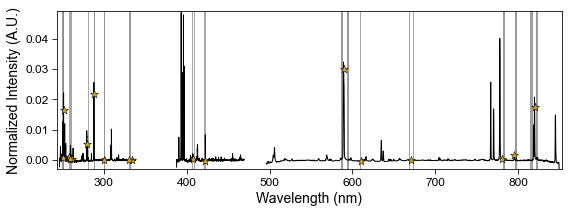

In [19]:
# get width of regions
noise['width'] = noise['stop'] - noise['start']

#make rectangles
for i in np.array(range(len(noise))):
    x = noise['start'][i]  
    width = noise['width'][i]
    box_list.append(Rectangle((x, b_y), width, height))
    
pc = PatchCollection(box_list, edgecolor = to_rgba(rcolor, alpha), facecolor=to_rgba(rcolor, alpha))
#pc = PatchCollection(box_list, hatch = '..')

# plot it all
fig, ax = plt.subplots(1, figsize = (8,3))
ax.plot(x_data, y_data, color=base, linewidth = lwidth, alpha = b_a, zorder=1) #spectrum
ax.scatter(peak_x, peak_y, facecolor = mcolor, edgecolor=base, s = size, marker = mark, linewidth = mwidth, zorder=3) # peaks
ax.add_collection(pc) # noise regions
ax.margins(x=0.005, y=0.0)
ax.set_xlabel('Wavelength (nm)', fontsize=lsize)
ax.set_ylabel('Normalized Intensity (A.U.)', fontsize = lsize)
ax.tick_params(length=klen, labelsize=ysize)

plt.tight_layout()
plt.savefig(fp + "figures\\braga_regions.eps", dpi=600)
plt.savefig(fp + "figures\\braga_regions.jpg", dpi=600)
plt.show()

# Concentration boxplots

In [62]:
comps_path = fp + "tables\\TableS1_sample_compositions.xlsx"
mhc_comps = pd.read_excel(comps_path, sheet_name='MHC')
lanl_comps = pd.read_excel(comps_path, sheet_name='LANL')

# remove units
mhc_comps.columns = mhc_comps.columns.str.strip(' (wt%)| (ppm)')
lanl_comps.columns = lanl_comps.columns.str.strip(' (wt%)| (ppm)')

# subsect into majors and minors
majors = ('SiO2|MnO|Na2O')
maj_mhc = mhc_comps.loc[:,mhc_comps.columns.str.contains(majors)]
maj_lanl = lanl_comps.loc[:,lanl_comps.columns.str.contains(majors)]
min_mhc = mhc_comps.loc[:,~mhc_comps.columns.str.contains(majors+'|Sample')]
min_lanl = lanl_comps.loc[:,~lanl_comps.columns.str.contains(majors+'|Sample')]

#### Prepare boxplot data and formatting

In [63]:
maj_ticks = maj_mhc.columns
min_ticks = min_mhc.columns

maj_lanl_data = []
min_lanl_data = []
maj_mhc_data = []
min_mhc_data = []

# get outlier vals to later remove
out_elem = ['Na2O', 'MnO', 'Li', 'Ni', 'Pb', 'Rb', 'Sr', 'Zn']
out_vals = [15, 15, 285, 577, 219, 354, 739, 448]
outliers = pd.DataFrame({
        'element' : out_elem,
        'outlier' : out_vals
})

# get data in right format
for element in maj_ticks:
    if element == 'SiO2':
        maj_lanl_df = maj_lanl[element].dropna().tolist()   
        maj_lanl_data.append(maj_lanl_df)
        maj_mhc_df = maj_mhc[element].dropna().tolist()
        maj_mhc_data.append(maj_mhc_df)
    
    else:
        maj_lanl_df = maj_lanl[element].dropna().tolist()
        maj_mhc_df = maj_mhc[element].dropna().tolist()

        outlier = outliers[outliers['element'] == element]['outlier'].iloc[0]
        maj_lanl_df = [i for i in maj_lanl_df if i <= outlier]
        maj_mhc_df = [i for i in maj_mhc_df if i <= outlier]

        maj_lanl_data.append(maj_lanl_df)
        maj_mhc_data.append(maj_mhc_df)
    
for element in min_ticks:
    min_lanl_df = min_lanl[element].dropna().tolist()
    min_mhc_df = min_mhc[element].dropna().tolist()
        
    outlier = outliers[outliers['element'] == element]['outlier'].iloc[0]
    min_lanl_df = [i for i in min_lanl_df if i <= outlier]
    min_mhc_df = [i for i in min_mhc_df if i <= outlier]
    
    min_lanl_data.append(min_lanl_df)
    min_mhc_data.append(min_mhc_df)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
# set how outlier points look
flierprops = dict(marker='x', markeredgecolor='#c9c9c9', markersize=2)

#### Plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


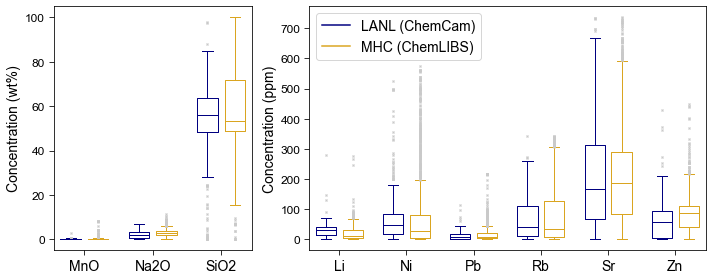

In [64]:
fig, (major, minor) = plt.subplots(ncols = 2, figsize = (10,4),
                                # make major one smaller
                                gridspec_kw={'width_ratios': [1,2]})

# box positions
maj_left_pos = np.array(range(len(maj_ticks)))*2.0-0.4
maj_right_pos = np.array(range(len(maj_ticks)))*2.0+0.4
min_left_pos = np.array(range(len(min_ticks)))*2.0-0.4
min_right_pos = np.array(range(len(min_ticks)))*2.0+0.4

# majors
bp_maj_lanl = major.boxplot(maj_lanl_data, flierprops=flierprops, positions = maj_left_pos, widths=0.6, showfliers=True)
bp_maj_mhc = major.boxplot(maj_mhc_data, flierprops=flierprops, positions = maj_right_pos, widths=0.6, showfliers=True)
set_box_color(bp_maj_lanl, c_l)
set_box_color(bp_maj_mhc, c_m)

# minors
bp_min_lanl = minor.boxplot(min_lanl_data, flierprops=flierprops, positions = min_left_pos, widths=0.6, showfliers=True)
bp_min_mhc = minor.boxplot(min_mhc_data, flierprops=flierprops, positions = min_right_pos, widths=0.6, showfliers=True)
set_box_color(bp_min_lanl, c_l)
set_box_color(bp_min_mhc, c_m)
 
# set plot labels
major.set_xticks(range(0, len(maj_ticks) * 2, 2))
major.set_xticklabels(maj_ticks, fontsize=lsize)
major.tick_params(axis = 'y', which = 'major', labelsize = ysize) 
major.set_ylabel('Concentration (wt%)', fontsize=lsize)
major.tick_params(length=klen)

minor.set_xticks(range(0, len(min_ticks) * 2, 2))
minor.set_xticklabels(min_ticks, fontsize=lsize)
minor.tick_params(axis = 'y', which = 'major', labelsize = ysize) 
minor.set_ylabel('Concentration (ppm)', fontsize=lsize)
minor.tick_params(length=klen)


plt.plot([], c=c_l, label=llabel)
plt.plot([], c=c_m, label=mlabel)
plt.legend(loc = 'best', fontsize=lsize)

plt.tight_layout()
plt.savefig(fp + "figures\\comps_boxplot.eps")
plt.savefig(fp + "figures\\comps_boxplot.jpg")
plt.show()

# Braga vs. metals
- ChemLIBS, Mars atmosphere
- LOQ and RMSE-P

USE HIGHEST NATURAL OUTLIER RESULTS

In [3]:
data1 = data[(data.instrument == "ChemLIBS") & 
             (data.atmosphere == "Mars") &
             (data.outlier_defn == 'highest_natural')].copy(deep=True)

maj_list = ['MnO', 'Na2O', 'SiO2']
maj1_b = pd.DataFrame(data1[(data1.element.isin(maj_list)) &
                           (data1.method == 'braga')].reset_index(drop=True))
maj1_m = pd.DataFrame(data1[(data1.element.isin(maj_list)) &
                           (data1.method == 'metals')].reset_index(drop=True))
min1_b = data1[(~data1.element.isin(maj_list)) &
               (data1.method == 'braga')].reset_index(drop=True)
min1_m = data1[(~data1.element.isin(maj_list)) &
               (data1.method == 'metals')].reset_index(drop=True)

### Bar plot

In [17]:
def braga_metals(lotype):
    
    # define plot stuff
    width = 0.2
    c_b = '#3a2382'
    c_m = '#9588BF'
    cap= 3
    ysize = 12
    klen = 5
    lsize = 14
    tsize = 16

    #labels
    majlab = maj1_b.element
    minlab = min1_b.element

    # tick locations
    majt1 = [0, 0.5, 1] 
    majt2 = [x + width for x in majt1]
    mint1 = np.arange(0,3,step=0.5)
    mint2 = [x + width for x in mint1]
    majtk = [x + width/2 for x in majt1]
    mintk = [x + width/2 for x in mint1]

    # make figure
    fig, (maj, minor) = plt.subplots(ncols = 2, figsize = (10,4),
                                     # make major one smaller
                                     gridspec_kw={'width_ratios': [1,2]})
    # majors
    major_b = maj.bar(majt1, maj1_b[lotype], width, yerr=maj1_b[lotype+'_sd'], capsize=cap, label = "Braga", color = c_b)
    major_m = maj.bar(majt2, maj1_m[lotype], width, yerr=maj1_m[lotype+'_sd'], capsize=cap, label = "metals", color = c_m)
    # minors
    minor_b = minor.bar(mint1, min1_b[lotype], width, yerr=min1_b[lotype+'_sd'], capsize=cap, label = "Braga", color = c_b)
    minor_m = minor.bar(mint2, min1_m[lotype], width, yerr=min1_m[lotype+'_sd'], capsize=cap, label = "metals", color = c_m)

    # formatting
    maj.tick_params(axis = 'y', which = 'major', labelsize = ysize,)
    maj.tick_params(length=klen)
    maj.set_xticks(majtk)
    maj.set_xticklabels(majlab, fontsize = lsize)
    maj.set_ylabel((lotype + " (wt%)"), fontsize = tsize)

    minor.set_xticks(mintk)
    minor.set_xticklabels(minlab, fontsize = lsize)
    minor.set_ylabel((lotype + " (ppm)"), fontsize = tsize)
    minor.tick_params(axis = 'y', which = 'major', labelsize = ysize)  
    minor.tick_params(length=klen)
    minor.legend(handles = [major_b, major_m], fontsize = lsize)

    # save image
    path = fp + "figures\\" + lotype + '_Braga_metals_new.eps'
    path1 = fp + "figures\\" + lotype + '_Braga_metals_new.jpeg'
    plt.savefig(path, bbox_inches="tight") # save as .eps
    plt.savefig(path1, bbox_inches="tight") # save as .jpeg
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


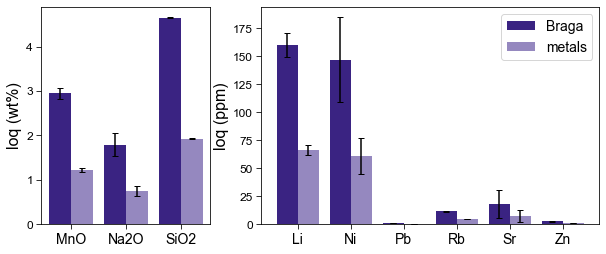

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


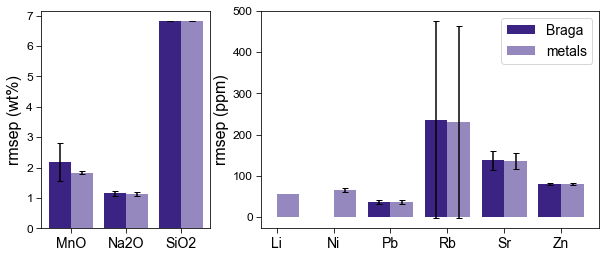

In [18]:
# make plots
braga_metals("loq")
braga_metals("rmsep")

# Atmosphere comparison
- Braga
- ChemLIBS
- LOQ and RMSE-P

In [26]:
data3 = data[(data.instrument == 'ChemLIBS') &
             (data.outlier_defn == 'highest_natural') &
             (data.method == 'metals')]
maj3 = data3[data3.element.isin(maj_list)].reset_index(drop=True)
min3 = data3[~data3.element.isin(maj_list)].reset_index(drop=True)

In [27]:
def maj_atm(atm, lotype):
    return maj3[maj3.atmosphere==atm][lotype]
    
def min_atm(atm, lotype):
    return min3[min3.atmosphere==atm][lotype]
    
def atmosphere(lotype):
    data = lotype
    error = lotype+'_sd'
    
    # define plot stuff
    width = 0.14
    c_m = '#a8261d'
    c_e = '#34a9c7'
    c_v = '#757778'
    ysize = 12
    lsize = 14
    tsize = 16
    cap = 3
    klen = 5

    #labels
    majlab = maj3.element.unique()
    minlab = min3.element.unique()

    # tick locations
    majt1 = [0, 0.5, 1] 
    majt2 = [x + width for x in majt1]
    majt3 = [x + width*2 for x in majt1]
    
    mint1 = np.arange(0,3,step=0.5)
    mint2 = [x + width for x in mint1]
    mint3 = [x + width*2 for x in mint1]
    
    majtk = [x + width for x in majt1]
    mintk = [x + width for x in mint1]

    # make figure
    fig, (maj, minor) = plt.subplots(ncols = 2, figsize = (10,4),
                                     # make major one smaller
                                     gridspec_kw={'width_ratios': [1,2]})
    # majors
    major1 = maj.bar(majt1, maj_atm('Mars', data), width, yerr=maj_atm('Mars', error), capsize=cap, label = "Mars", color = c_m)
    major2 = maj.bar(majt2, maj_atm('Earth', data), width, yerr=maj_atm('Earth', error), capsize=cap, label = "Earth", color = c_e)
    major3 = maj.bar(majt3, maj_atm('Vacuum', data), width, yerr=maj_atm('Vacuum', error), capsize=cap, label = "Vacuum", color = c_v)
    # minors
    minor1 = minor.bar(mint1, min_atm('Mars', data), width, yerr=min_atm('Mars', error), capsize=cap, label = "Mars", color = c_m)
    minor2 = minor.bar(mint2, min_atm('Earth', data), width, yerr=min_atm('Earth', error), capsize=cap, label = "Earth", color = c_e)
    minor3 = minor.bar(mint3, min_atm('Vacuum', data), width, yerr=min_atm('Vacuum', error), capsize=cap, label = "Vacuum", color = c_v)

    # formatting
    maj.tick_params(axis = 'y', which = 'major', labelsize = ysize)
    maj.tick_params(length=klen)
    maj.set_xticks(majtk)
    maj.set_xticklabels(majlab, fontsize = lsize)
    maj.set_ylabel((lotype + " (wt%)"), fontsize = tsize)

    minor.set_xticks(mintk)
    minor.set_xticklabels(minlab, fontsize = lsize)
    minor.set_ylabel((lotype + " (ppm)"), fontsize = tsize)
    minor.tick_params(axis = 'y', which = 'major', labelsize = ysize)  
    minor.tick_params(length=klen)
    minor.legend(handles = [major1, major2, major3], fontsize = lsize)

    # save image
    path = fp + "figures\\"+lotype+"_atmosphere_new_metals.eps"
    path1 = fp + "figures\\"+lotype+"_atmosphere_new_metals.jpeg"
    plt.savefig(path, bbox_inches="tight") # save as .eps
    plt.savefig(path1, bbox_inches="tight") # save as .jpeg
    
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


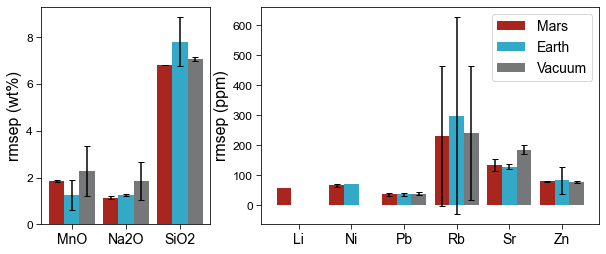

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


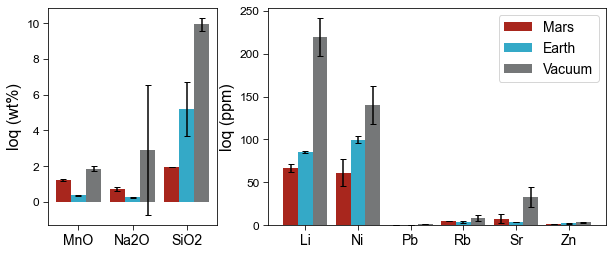

In [28]:
atmosphere('rmsep')
atmosphere('loq')

# All predicted vs. true and regression vector plots

#### Pred v. true

In [29]:
# make dictionary of 'Actual' uncertainties
unc_path = fp + "BureauVeritasuncertainties_forpaper.csv"
uncert = pd.read_csv(unc_path)
uncert = pd.Series(uncert.uncertainty.values, index=uncert.element).to_dict()

In [115]:
def pred_true_plot(folder_name, data, outlier, method):
#-------------------------GET-DATA--------------------------#
    folder = fp+'python_models\\'+folder_name+"\\"

    for file in tqdm(os.listdir(folder), desc = folder_name+' plots', leave=False):

        if outlier+"_"+method+'_test' in file:
            
            path = (folder + file)
            df = pd.read_csv(path)
            df = df[~df.pred.astype(str).str.contains('<LOQ|>100 wt%')]
            df.pred = df.pred.astype(float)
            
            element = file.split('_')[0]
            
            # get LDBQ
            temp = data[data.element==element]
            if method == 'braga':
                temp = temp[temp.method=='braga']
                c = '#3a2382'
            elif method == 'metals':
                temp = temp[temp.method=='metals']
                c = '#f58442'
            
            loq = temp['loq'].iloc[0]
            lob = temp['lob'].iloc[0]
            lod = temp['lod'].iloc[0]

#----------------------------MAKE-PLOT------------------------------#
            xlab = "True "+element
            ylab = "Predicted "+element
            xdata = df.actual
            ydata = df.pred
            xerr = uncert[element] # 'Actual' uncertainty
            yerr = temp['rmsep'].iloc[0] 

            b_type = 'dotted'
            d_type = 'dashed'
            q_type = 'solid'
            ddash = (0, (10, 2))
            c_p = "black"
            c_g = "darkgrey"
            c_e = "#bfbfbf"
            linew = 0.5
            line_c = 'white'
            lwidth = 1.5
            cap = 2.5
            xsize = 20
            klen = 5
            tsize = 16

            fig, ax = plt.subplots(1, figsize = (6,6))
            # plot data
            ax.scatter(xdata, ydata, c=c_p, linewidth = linew, edgecolors = line_c, zorder=2)
            # error bars
            ax.errorbar(x=xdata, y=ydata, c=c_e, xerr=xerr, yerr=yerr, fmt = '.', capsize=cap, zorder=1)
            # 1:1 line
            y_bot, y_top = plt.ylim() # get current auto-axes
            x_bot, x_top = plt.xlim()
            # make sure LDBQ not below edge
            top = max(y_top, x_top, loq+(0.1*loq))
            bot = min(y_bot, x_bot, 0)
            plt.xlim(x_bot, x_top) # reset to original axes
            plt.ylim(y_bot, y_top)
            one_one = ax.plot([bot,top], [bot,top], c=c_p, linewidth=lwidth, linestyle = ddash, label = "1:1")

            # plot lines
            zero = ax.axhline(y=0, xmin=0, xmax=1, c=c_p, linewidth=1, linestyle = q_type)
            lob_line = ax.axhline(y=lob, xmin = 0, xmax = 1, c=c, linewidth=lwidth, linestyle = b_type, label = "Braga LOB")
            lod_line = ax.axhline(y=lod, xmin = 0, xmax = 1, c=c, linewidth=lwidth, linestyle = d_type, label = "Braga LOD")
            loq_line = ax.axhline(y=loq, xmin = 0, xmax = 1, c=c, linewidth=lwidth, linestyle = q_type, label = "Braga LOQ")

            # format
            ax.set_xlabel(xlab, fontsize = xsize)
            ax.set_ylabel(ylab, fontsize = xsize)
            ax.tick_params(length=klen, labelsize=tsize)

            plt.tight_layout()
            plt.savefig(fp + "figures\\new_pred_true\\"+folder_name+"\\"+element+"_"+method+".eps", dpi=600)
            plt.savefig(fp + "figures\\new_pred_true\\"+folder_name+"\\"+element+"_"+method+".jpg", dpi=600)
            plt.close(fig)

#### Regression vector

In [119]:
cl_key = pd.read_csv(fp+'CL_all_Mars_spectra.csv', usecols=[0])
cc_key = pd.read_csv(fp+'CC_all_Mars_spectra.csv', usecols=[0])

In [132]:
def reg_plot(folder_name, temp, outlier, method):
#-------------------------GET-DATA--------------------------#
    folder = fp+'python_models\\'+folder_name+"\\"
    inst = folder_name.split('_')[0]

    for file in tqdm(os.listdir(folder), desc = folder_name+' plots', leave=False):

        if outlier+'_coeff' in file:
            path = (folder + file)
            df = pd.read_csv(path)
    
            element = file.split('_')[0]

#----------------------------MAKE-PLOT------------------------------#
            path_name = instrument+"_"+atmosphere+"\\"
            fig_name = element+"_"+n_range
            
            if inst == 'CL':
                xdata = cl_key['wave']
            elif inst == 'CC':
                xdata = cc_key['wave']
            ydata = df['0']
            c_p = 'black'
            xlab = 'Wavelength (nm)'
            ylab = 'Weight (A.U.)'
            title = element+": "+instrument+" "+atmosphere+" "+n_range
            xsize=20
            tsize = 16
            klen = 5

            fig, ax = plt.subplots(1, figsize = (10,6))
            ax.plot(xdata, ydata, c = c_p)
            ax.set_xlabel(xlab, fontsize = xsize)
            ax.set_ylabel(ylab, fontsize = xsize)
            ax.tick_params(length=klen, labelsize=tsize)
            plt.title(title, fontsize=tsize)

            # save
            plt.tight_layout()
            plt.savefig(fp + "figures\\new_regression_vectors\\"+folder_name+"\\"+element+"_"+method+".eps", dpi=600)
            plt.savefig(fp + "figures\\new_regression_vectors\\"+folder_name+"\\"+element+"_"+method+".jpg", dpi=600)
            plt.close(fig)

In [133]:
envs = [['LANL', 'Mars'],['ChemLIBS', 'Mars'],['ChemLIBS', 'Earth'],['ChemLIBS', 'Vacuum']]
inst_alias = {'ChemLIBS':'CL','LANL':'CC'}

outlier = 'highest_natural'
method = 'braga'

for env in envs:
    
    instrument = env[0]
    atmosphere = env[1]
    
    for n_range in ['0-750', '250-1000']:
        
        temp = detail_data[(detail_data.instrument == instrument) &
                           (detail_data.atmosphere == atmosphere) &
                           (detail_data.outlier_defn == outlier) &
                           (detail_data.num_range == n_range)]
        
        folder_name = "{}_{}_{}\\".format(inst_alias[instrument], atmosphere, n_range)
        
        #pred_true_plot(folder_name, temp, outlier, method)
        reg_plot(folder_name, temp, outlier, method)

CC_Mars_0-750\ plots:   0%|          | 0/105 [00:00<?, ?it/s]

CC_Mars_250-1000\ plots:   0%|          | 0/103 [00:00<?, ?it/s]

CL_Mars_0-750\ plots:   0%|          | 0/105 [00:00<?, ?it/s]

CL_Mars_250-1000\ plots:   0%|          | 0/105 [00:00<?, ?it/s]

CL_Earth_0-750\ plots:   0%|          | 0/103 [00:00<?, ?it/s]

CL_Earth_250-1000\ plots:   0%|          | 0/105 [00:00<?, ?it/s]

CL_Vacuum_0-750\ plots:   0%|          | 0/101 [00:00<?, ?it/s]

CL_Vacuum_250-1000\ plots:   0%|          | 0/101 [00:00<?, ?it/s]